# `Stock Price Prediction using RNN`

## Libraries

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## `1) Data Preprocessing`

### Importing Training Set

In [155]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")

In [156]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [157]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


### Grabbing the Google Stock Price

In [158]:
train_set = dataset_train["Open"].values

In [159]:
train_set

array([325.25, 331.27, 329.83, ..., 793.7 , 783.33, 782.75])

### Feature Scaling

<img src="../1_Intuition/images/Feature Scaling.png" width=720px>

In [160]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_set_scaled = scaler.fit_transform(train_set.reshape(-1,1)) # Reshape to 2D array

In [161]:
train_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a Data Structure with 60 timesteps and 1 output

In [162]:
X_train = []
y_train = []
for i in range(60, 1258): # 60 is the number of timesteps, 1258 is the number of observations
    X_train.append(train_set_scaled[i-60:i, 0]) # 60 previous stock prices to predict the next one
    y_train.append(train_set_scaled[i, 0]) # Next stock price to predict (the 61st)

In [163]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [164]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [165]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

### Reshaping

In [166]:
# Reshape to 3D array (batch_size, timesteps, input_dim) for RNN input format
# Q: What is input_dim?
# A: It is the number of indicators (features) we use to predict the stock price
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## `2) Building the RNN`

### Importing Keras Libraries

In [167]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM # Long Short Term Memory (RNN) layer for time series prediction (regression)
from keras.layers import Dropout # To prevent overfitting (regularization) by dropping some neurons

### Initialising the RNN

In [168]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [169]:
regressor.add(LSTM(
    units=50, # Number of neurons in the LSTM layer
    return_sequences=True, # Whether to return the last output in the output sequence, or the full sequence
    input_shape=(X_train.shape[1], 1) # Shape of the input (timesteps, input_dim)
))

regressor.add(Dropout(0.2)) # 20% of neurons will be dropped

### Adding a second LSTM layer and some Dropout regularisation

In [170]:
regressor.add(LSTM(
    units=50,
    return_sequences=True
))

regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [171]:
regressor.add(LSTM(
    units=50,
    return_sequences=True
))

regressor.add(Dropout(0.2)) 

### Adding a fourth LSTM layer and some Dropout regularisation

In [172]:
regressor.add(LSTM(
    units=50
)) # No return_sequences=True because this is the last LSTM layer

regressor.add(Dropout(0.2))

### Adding Output Layer

In [173]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [174]:
regressor.compile(
    optimizer="adam",
    loss="mean_squared_error"
)

## `3) Training the RNN`

In [175]:
regressor.fit(X_train, y_train,
              epochs=50,
              batch_size=32 # No. of observations after which weights are updated
)

Epoch 1/50
38/38 [==============================] - 13s 106ms/step - loss: 0.0407
Epoch 2/50
38/38 [==============================] - 4s 103ms/step - loss: 0.0069
Epoch 3/50
38/38 [==============================] - 4s 103ms/step - loss: 0.0053
Epoch 4/50
38/38 [==============================] - 4s 106ms/step - loss: 0.0053
Epoch 5/50
38/38 [==============================] - 5s 119ms/step - loss: 0.0052
Epoch 6/50
38/38 [==============================] - 4s 108ms/step - loss: 0.0050
Epoch 7/50
38/38 [==============================] - 4s 107ms/step - loss: 0.0046
Epoch 8/50
38/38 [==============================] - 4s 104ms/step - loss: 0.0044
Epoch 9/50
38/38 [==============================] - 4s 101ms/step - loss: 0.0047
Epoch 10/50
38/38 [==============================] - 4s 101ms/step - loss: 0.0043
Epoch 11/50
38/38 [==============================] - 4s 103ms/step - loss: 0.0049
Epoch 12/50
38/38 [==============================] - 4s 101ms/step - loss: 0.0041
Epoch 13/50
38/38 [=====

## `4) Making the Predictions and Visualising the Results`

### Getting the real stock price of 2017

In [176]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")

In [177]:
real_stock_price = dataset_test["Open"].values

### Combining the training and test data to compare the results

In [178]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)

In [179]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values # 60 previous stock prices to predict the next one
inputs = inputs.reshape(-1,1) # Reshape to 2D array
inputs = scaler.transform(inputs) # Normalization

C:\Users\Admin\AppData\Local\Temp\ipykernel_6920\2237746795.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values # 60 previous stock prices to predict the next one


In [180]:
X_test = []
for i in range(60, 80): # 60 is the number of timesteps, 80 is the number of observations
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [181]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Predictions

In [182]:
predicted_stock_price = regressor.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [183]:
# Denormalization to get the real stock price
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

### Visualizing the Results

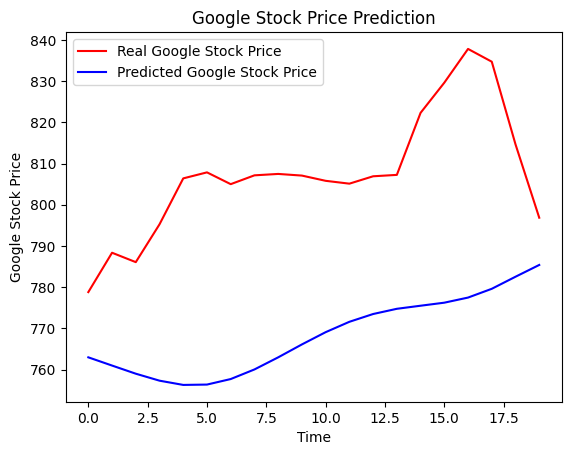

In [184]:
# Real stock price vs Predicted stock price
plt.plot(real_stock_price,
         color="red",
         label="Real Google Stock Price"
)
plt.plot(predicted_stock_price,
         color="blue",
         label="Predicted Google Stock Price"
)
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

## `5) Evaluating the RNN`

In [186]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

41.210848545074285